In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
ConsumptionSmoothing = namedtuple("ConsumptionSmoothing", 
                        ["R", "g1", "g2", "β_seq", "T"])

def create_consumption_smoothing_model(R=1.05, g1=1, g2=1/2, T=65):
    β = 1/R
    β_seq = np.array([β**i for i in range(T+1)])
    return ConsumptionSmoothing(R, g1, g2, 
                                β_seq, T)

In [3]:
model = create_consumption_smoothing_model()
model

ConsumptionSmoothing(R=1.05, g1=1, g2=0.5, β_seq=array([1.        , 0.95238095, 0.90702948, 0.8638376 , 0.82270247,
       0.78352617, 0.7462154 , 0.71068133, 0.67683936, 0.64460892,
       0.61391325, 0.58467929, 0.55683742, 0.53032135, 0.50506795,
       0.4810171 , 0.45811152, 0.43629669, 0.41552065, 0.39573396,
       0.37688948, 0.35894236, 0.34184987, 0.32557131, 0.31006791,
       0.29530277, 0.28124073, 0.26784832, 0.25509364, 0.24294632,
       0.23137745, 0.22035947, 0.20986617, 0.19987254, 0.1903548 ,
       0.18129029, 0.17265741, 0.16443563, 0.15660536, 0.14914797,
       0.14204568, 0.1352816 , 0.12883962, 0.1227044 , 0.11686133,
       0.11129651, 0.10599668, 0.10094921, 0.09614211, 0.09156391,
       0.08720373, 0.08305117, 0.07909635, 0.07532986, 0.07174272,
       0.0683264 , 0.06507276, 0.06197406, 0.05902291, 0.0562123 ,
       0.05353552, 0.05098621, 0.0485583 , 0.046246  , 0.04404381,
       0.04194648]), T=65)

In [4]:
def compute_optimal(model, a0, y_seq):
    R, T = model.R, model.T

    # 非金融财富
    h0 = model.β_seq @ y_seq     # 由于 β = 1/R

    # c0
    c0 = (1 - 1/R) / (1 - (1/R)**(T+1)) * (a0 + h0)
    c_seq = c0*np.ones(T+1)

    # 验证
    A = np.diag(-R*np.ones(T), k=-1) + np.eye(T+1)
    b = y_seq - c_seq
    b[0] = b[0] + a0

    a_seq = np.linalg.inv(A) @ b
    a_seq = np.concatenate([[a0], a_seq])

    return c_seq, a_seq, h0

In [5]:
# 金融财富
a0 = -2     # 如 "学生债务"

# 非金融收入过程
y_seq = np.concatenate([np.ones(46), np.zeros(20)])

cs_model = create_consumption_smoothing_model()
c_seq, a_seq, h0 = compute_optimal(cs_model, a0, y_seq)

print('检验 a_T+1=0:', 
      np.abs(a_seq[-1] - 0) <= 1e-8)

检验 a_T+1=0: True


/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34701 (\N{CJK UNIFIED IDEOGRAPH-878D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabt

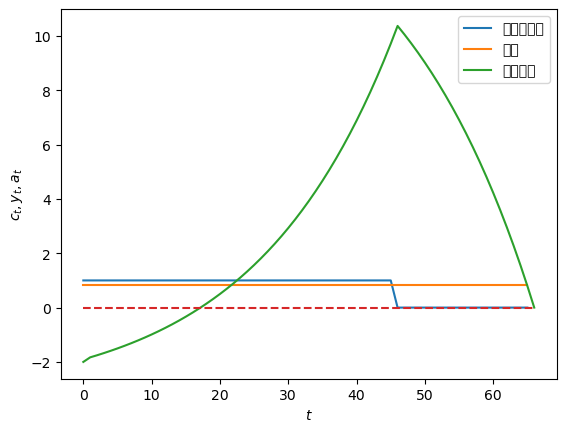

In [6]:
# 序列长度
T = cs_model.T

plt.plot(range(T+1), y_seq, label='非金融收入')
plt.plot(range(T+1), c_seq, label='消费')
plt.plot(range(T+2), a_seq, label='金融财富')
plt.plot(range(T+2), np.zeros(T+2), '--')

plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$c_t,y_t,a_t$')
plt.show()

In [7]:
def welfare(model, c_seq):
    β_seq, g1, g2 = model.β_seq, model.g1, model.g2

    u_seq = g1 * c_seq - g2/2 * c_seq**2
    return β_seq @ u_seq

print('福利:', welfare(cs_model, c_seq))

福利: 13.285050962183433


In [8]:
def plot_cs(model,    # 消费平滑模型      
            a0,       # 初始金融财富
            y_seq     # 非金融收入过程
           ):
    
    # 计算最优消费
    c_seq, a_seq, h0 = compute_optimal(model, a0, y_seq)
    
    # 序列长度
    T = cs_model.T
    
    # 生成图表
    plt.plot(range(T+1), y_seq, label='非金融收入')
    plt.plot(range(T+1), c_seq, label='消费')
    plt.plot(range(T+2), a_seq, label='金融财富')
    plt.plot(range(T+2), np.zeros(T+2), '--')
    
    plt.legend()
    plt.xlabel(r'$t$')
    plt.ylabel(r'$c_t,y_t,a_t$')
    plt.show()

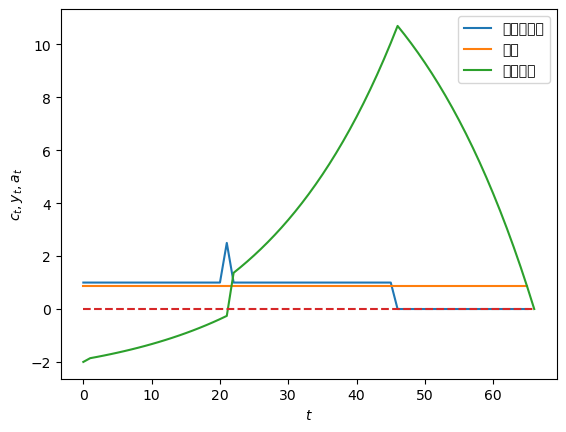

In [9]:
# 意外收入 W_0 = 2.5
y_seq_pos = np.concatenate([np.ones(21), np.array([2.5]), np.ones(24), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_pos)

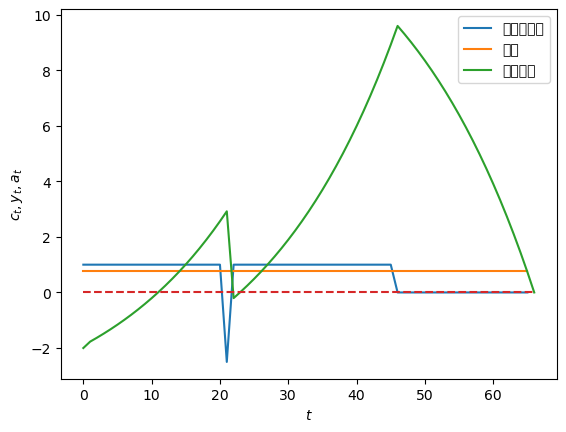

In [10]:
# 灾难 W_0 = -2.5
y_seq_neg = np.concatenate([np.ones(21), np.array([-2.5]), np.ones(24), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_neg)

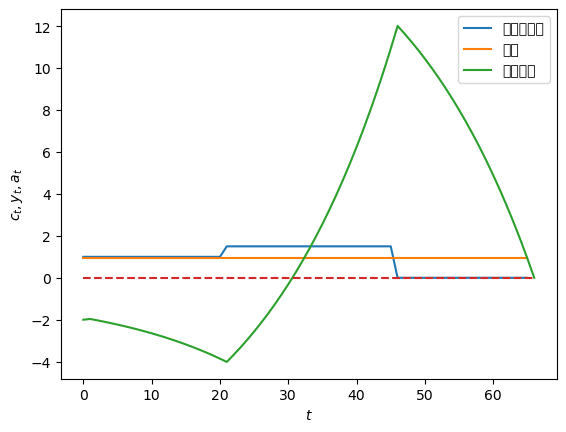

In [11]:
# 长期正面收入变化 W = 0.5 在 t >= 21 时
y_seq_pos = np.concatenate(
    [np.ones(21), 1.5*np.ones(25), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_pos)

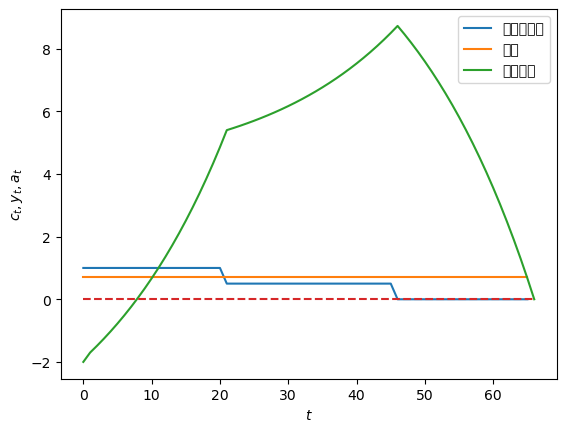

In [12]:
# 长期负面收入变化 W = -0.5 在 t >= 21 时
y_seq_neg = np.concatenate(
    [np.ones(21), .5*np.ones(25), np.zeros(20)])

plot_cs(cs_model, a0, y_seq_neg)

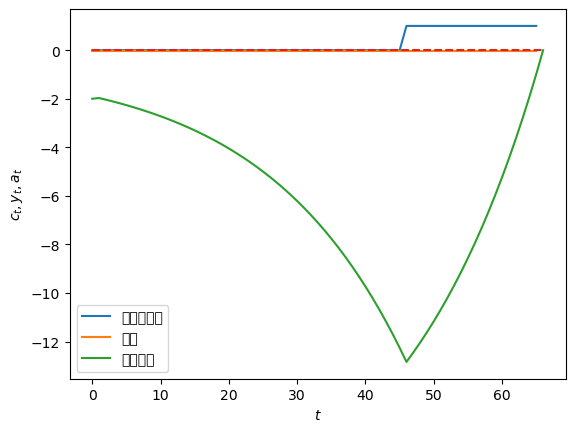

In [13]:
# 晚起的开始者
y_seq_late = np.concatenate(
    [np.zeros(46), np.ones(20)])

plot_cs(cs_model, a0, y_seq_late)

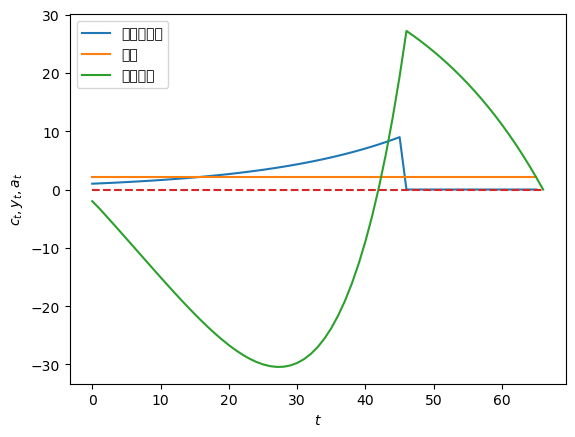

In [14]:
# 几何增长的收入参数，λ = 1.05
λ = 1.05
y_0 = 1
t_max = 46

# 生成几何增长的 y 序列
geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

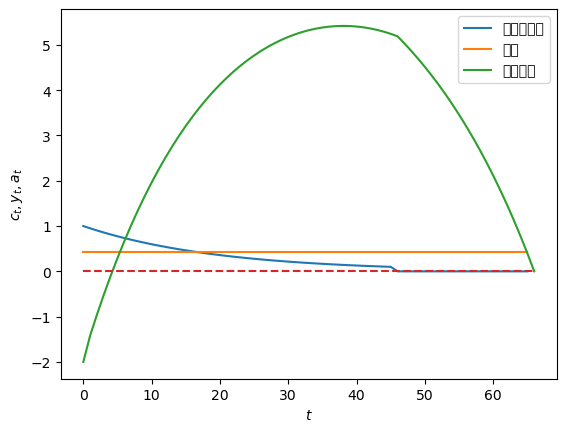

In [15]:
λ = 0.95

geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

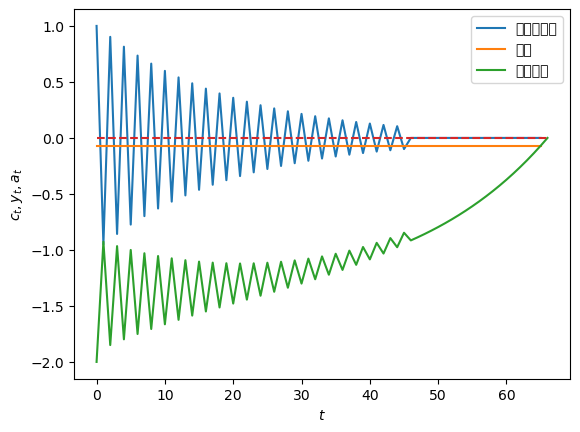

In [16]:
λ = -0.95

geo_seq = λ ** np.arange(t_max) * y_0 
y_seq_geo = np.concatenate(
            [geo_seq, np.zeros(20)])

plot_cs(cs_model, a0, y_seq_geo)

In [17]:
def compute_variation(model, ξ1, ϕ, a0, y_seq, verbose=1):
    R, T, β_seq = model.R, model.T, model.β_seq

    ξ0 = ξ1*((1 - 1/R) / (1 - (1/R)**(T+1))) * ((1 - (ϕ/R)**(T+1)) / (1 - ϕ/R))
    v_seq = np.array([(ξ1*ϕ**t - ξ0) for t in range(T+1)])
    
    if verbose == 1:
        print('检查可行性:', np.isclose(β_seq @ v_seq, 0))     # 因为 β = 1/R

    c_opt, _, _ = compute_optimal(model, a0, y_seq)
    cvar_seq = c_opt + v_seq

    return cvar_seq

Font 'default' does not have a glyph for '\u6700' [U+6700], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4f18' [U+4f18], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u6700' [U+6700], substituting with a dummy symbol.


Font 'default' does not have a glyph for '\u4f18' [U+4f18], substituting with a dummy symbol.


变化 0: ξ1=0.01, ϕ=0.95
检查可行性: True
福利=13.285009346064836
----------------------------------------------------------------
变化 1: ξ1=0.01, ϕ=1.02
检查可行性: True
福利=13.284911631015438
----------------------------------------------------------------
变化 2: ξ1=0.05, ϕ=0.95
检查可行性: True
福利=13.284010559218512
----------------------------------------------------------------
变化 3: ξ1=0.05, ϕ=1.02
检查可行性: True
福利=13.28156768298361
----------------------------------------------------------------


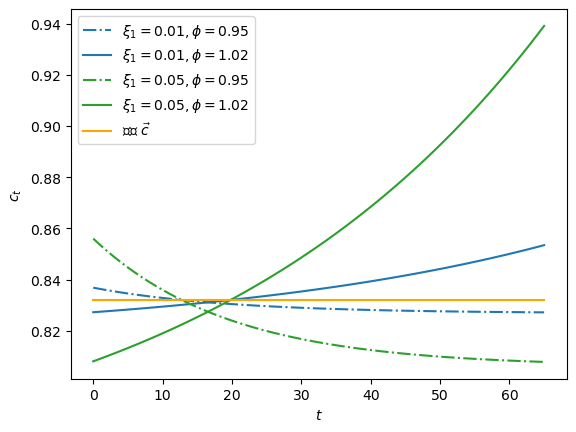

In [18]:
fig, ax = plt.subplots()

ξ1s = [.01, .05]
ϕs= [.95, 1.02]
colors = {.01: 'tab:blue', .05: 'tab:green'}

params = np.array(np.meshgrid(ξ1s, ϕs)).T.reshape(-1, 2)

for i, param in enumerate(params):
    ξ1, ϕ = param
    print(f'变化 {i}: ξ1={ξ1}, ϕ={ϕ}')
    cvar_seq = compute_variation(model=cs_model, 
                                 ξ1=ξ1, ϕ=ϕ, a0=a0, 
                                 y_seq=y_seq)
    print(f'福利={welfare(cs_model, cvar_seq)}')
    print('-'*64)
    if i % 2 == 0:
        ls = '-.'
    else: 
        ls = '-'  
    ax.plot(range(T+1), cvar_seq, ls=ls, 
            color=colors[ξ1], 
            label=fr'$\xi_1 = {ξ1}, \phi = {ϕ}$')

plt.plot(range(T+1), c_seq, 
         color='orange', label=r'最优 $\vec{c}$ ')

plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$c_t$')
plt.show()

In [19]:
def welfare_rel(ξ1, ϕ):
    """
    Compute welfare of variation sequence 
    for given ϕ, ξ1 with a consumption smoothing model
    """
    
    cvar_seq = compute_variation(cs_model, ξ1=ξ1, 
                                 ϕ=ϕ, a0=a0, 
                                 y_seq=y_seq, 
                                 verbose=0)
    return welfare(cs_model, cvar_seq)

# 向量化该函数以允许数组输入
welfare_vec = np.vectorize(welfare_rel)

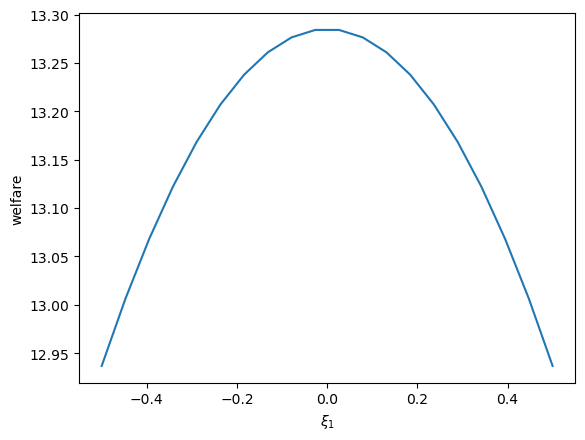

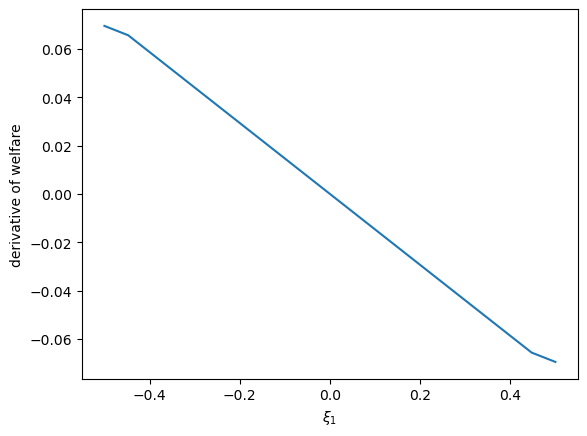

In [20]:
ξ1_arr = np.linspace(-0.5, 0.5, 20)

plt.plot(ξ1_arr, welfare_vec(ξ1_arr, 1.02))
plt.ylabel('welfare')
plt.xlabel(r'$\xi_1$')
plt.show()

welfare_grad = welfare_vec(ξ1_arr, 1.02)
welfare_grad = np.gradient(welfare_grad)
plt.plot(ξ1_arr, welfare_grad)
plt.ylabel('derivative of welfare')
plt.xlabel(r'$\xi_1$')
plt.show()

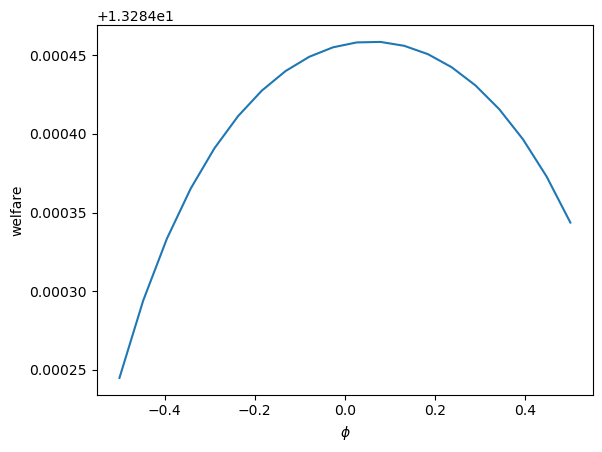

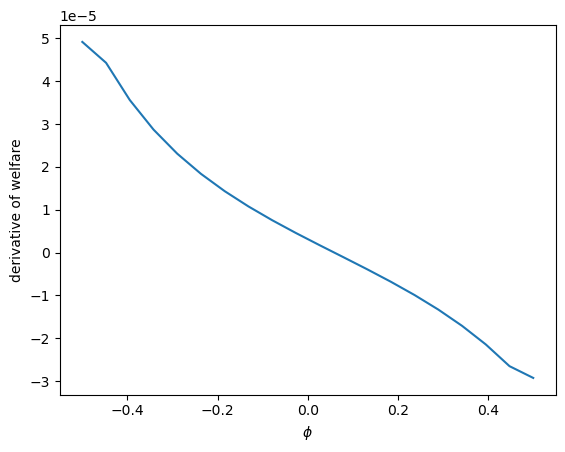

In [21]:
ϕ_arr = np.linspace(-0.5, 0.5, 20)

plt.plot(ξ1_arr, welfare_vec(0.05, ϕ_arr))
plt.ylabel('welfare')
plt.xlabel(r'$\phi$')
plt.show()

welfare_grad = welfare_vec(0.05, ϕ_arr)
welfare_grad = np.gradient(welfare_grad)
plt.plot(ξ1_arr, welfare_grad)
plt.ylabel('derivative of welfare')
plt.xlabel(r'$\phi$')
plt.show()